# Desafios Aula 3

## Desafio 01: Criar tabelas de frequência com pandas.groupby()

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento']) # Versão com o crosstab

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index') # Versão com o crosstab normalizada

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
com_droga = dados[dados['tratamento']=='com_droga'].groupby(['dose','tempo']).count()['tratamento'] #Agrupa os dados por dose e por tempo e faz a contagem para os dados com_droga

In [ ]:
com_controle = dados[dados['tratamento']=='com_controle'].groupby(['dose','tempo']).count()['tratamento'] #Agrupa os dados por dose e por tempo e faz a contagem para os dados com_controle

In [ ]:
com_droga

dose  tempo
D1    24       3585
      48       4011
      72       3600
D2    24       3581
      48       3591
      72       3580
Name: tratamento, dtype: int64

In [ ]:
com_controle

dose  tempo
D1    24       301
      48       343
      72       307
D2    24       305
      48       305
      72       305
Name: tratamento, dtype: int64

In [ ]:
concatenado = pd.concat([com_controle,com_droga],axis=1) #Juntando tudo em um único dataframe

In [ ]:
concatenado

tratamento  tratamento
dose tempo                        
D1   24            301        3585
     48            343        4011
     72            307        3600
D2   24            305        3581
     48            305        3591
     72            305        3580

In [ ]:
concatenado.columns = ['com_controle','com_droga'] #mudando o nome das colunas

In [ ]:
concatenado

com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
concatenado.div(concatenado.sum(axis=1),axis=0) # Normalizando os dados

com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

## Desafio 02: Normalizar o crosstab pela coluna.

[Documentação Pandas crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=crosstab#pandas.crosstab)

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns') # Versão com o crosstab normalizada

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

## Desafio 03: Explorar outros agregadores.

Aqui algumas opções de agregadores. Na [documentação do pandas](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html?highlight=aggfunc) você pode obter ainda mais opções.

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='last')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           0.0465     0.6660
     48           1.1120     0.1420
     72          -0.6204    -0.8598
D2   24           0.7200    -1.3260
     48           0.3942    -0.1150
     72          -0.1051    -0.4330

## Desafio 04: Explorar o melt.

A documentação do melt no pandas pode ser acessada através deste [link](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). 

Exemplo de aplicação onde queremos comparar a dose com o valor de g-0:




In [ ]:
pd.melt(dados,id_vars=['dose'],value_vars=['g-0'])

,dose,variable,value
0,D1,g-0,1.0620
1,D1,g-0,0.0743
2,D1,g-0,0.6280
3,D1,g-0,-0.5138
4,D2,g-0,-0.3254
...,...,...,...
23809,D2,g-0,0.1394
23810,D2,g-0,-1.3260
23811,D2,g-0,0.3942
23812,D1,g-0,0.6660


## Desafio 05: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

In [ ]:
corr = dados.loc[:,'g-0':'c-99'].corr()

In [ ]:
corr_celular_genes = corr.loc['g-0':'g-50','c-0':'c-50']

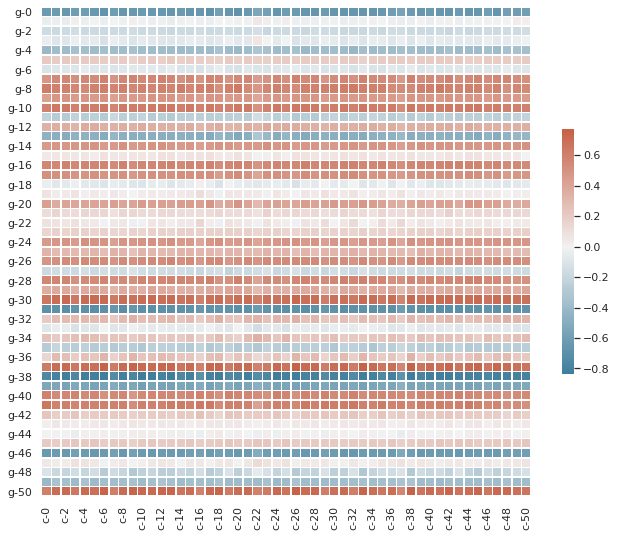

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular_genes, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

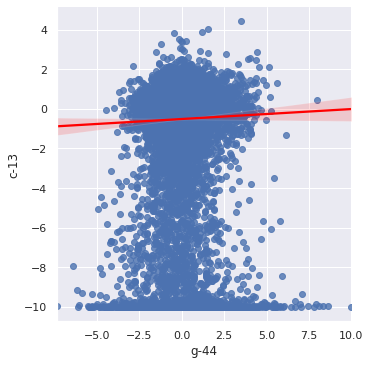

In [ ]:
sns.lmplot(data=dados, x='g-44', y='c-13', line_kws={'color': 'red'})

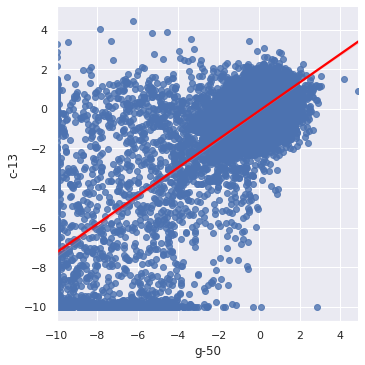

In [ ]:
sns.lmplot(data=dados, x='g-50', y='c-13', line_kws={'color': 'red'})

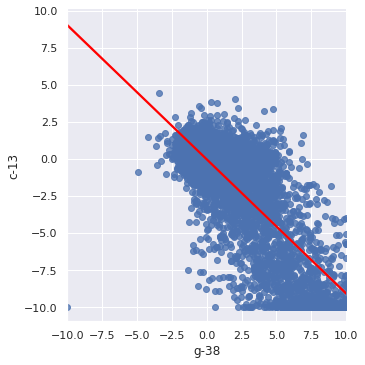

In [ ]:
sns.lmplot(data=dados, x='g-38', y='c-13', line_kws={'color': 'red'})

## Desafio 06: Estudar o código que plota a matriz de correlação (heatmap)

In [ ]:
corr_genes = dados.loc[:,'g-0':'g-50'].corr()

Gera uma matriz de 1 (True) no tamanho do dataframe de correlação

In [ ]:
np.ones_like(corr_genes, dtype=bool)

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Gera uma mascara para o triangulo superior

In [ ]:
mask = np.triu(np.ones_like(corr_genes, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

Cria uma paleta de cores com o Azul para correlações negativas e e Laranja para as positivas

In [ ]:
cmap = sns.diverging_palette(h_neg=220, h_pos=20, as_cmap=True)

Desenha um mapa de calor aplicando a mascara e utilizando a paleta de cores.

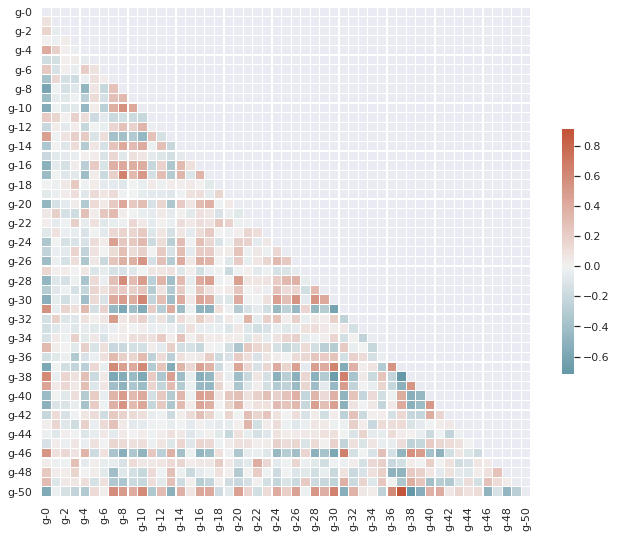

In [ ]:
# Comando equivalete ao plt.figure com a diferença que separa entre figura e eixos
# f, ax = plt.subplots(figsize=(11, 9))

plt.figure(figsize=(11, 9))

sns.heatmap(corr_genes, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5})

## Desafio 07: Resumo do que você aprendeu com os dados

O estudo sobre a base de dados é livre. Tente extrair o máximo de informações da base de dados com o que aprendeu nesta aula e compartilhe no Discord e nas redes sociais como forma de construção do seu portfólio em Data Science.